# Project: Wrangling and Analyze Data

##### Import required libraries

In [166]:
import pandas as pd
import numpy as np
import requests
import tweepy
from tweepy import OAuthHandler
import json 
from timeit import default_timer as timer

# Set some viewing options
pd.set_option('max_rows', None)
pd.set_option('max_columns', None)
pd.set_option('max_colwidth', None)

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [121]:
# Download twitter-archive-enhanced file directly from web and add to project.
# Import file contents into pandas dataframe called twitter_archive

twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [122]:
# Import image_predictions.tsv using requests library

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url, allow_redirects=True)

# Save to local tsv file
open('image-predictions.tsv', 'wb').write(r.content)

# Load image-predictions into a dataframe
image_predtictions = pd.read_csv('image-predictions.tsv', sep='\t')

# https://www.tutorialspoint.com/downloading-files-from-web-using-python

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [123]:
# Note to evaluator - Not using the Twitter API since it does not work without having a paid developer account.
# Using the backup option of importing tweet_json.txt file directly from Udacity

# DO NOT RUN THIS CODE - adding failsafe so that this block will not run unless exec_api_code is set to True
exec_api_code = False

if exec_api_code:
    # Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
    # These are hidden to comply with Twitter's API terms and conditions
    consumer_key = 'HIDDEN'
    consumer_secret = 'HIDDEN'
    access_token = 'HIDDEN'
    access_secret = 'HIDDEN'

    auth = OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_secret)

    api = tweepy.API(auth, wait_on_rate_limit=True)

    # NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
    # df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
    # change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
    # NOTE TO REVIEWER: this student had mobile verification issues so the following
    # Twitter API code was sent to this student from a Udacity instructor
    # Tweet IDs for which to gather additional data via Twitter's API
    tweet_ids = twitter_archive.tweet_id.values
    len(tweet_ids)

    # Query Twitter's API for JSON data for each tweet ID in the Twitter archive
    count = 0
    fails_dict = {}
    start = timer()
    # Save each tweet's returned JSON as a new line in a .txt file
    with open('tweet_json.txt', 'w') as outfile:
        # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
        for tweet_id in tweet_ids:
            count += 1
            print(str(count) + ": " + str(tweet_id))
            try:
                tweet = api.get_status(tweet_id, tweet_mode='extended')
                print("Success")
                json.dump(tweet._json, outfile)
                outfile.write('\n')
            except tweepy.TweepError as e:
                print("Fail")
                fails_dict[tweet_id] = e
                pass
    end = timer()
    print(end - start)
    print(fails_dict)

In [124]:
# Read the data from the tweet_json.txt file, line by line, into Pandas dataframe
with open('tweet_json.txt') as f:
    tweet_api = pd.DataFrame(json.loads(line) for line in f)

# Keep only the columns we need
tweet_details = tweet_api[['id', 'retweet_count', 'favorite_count']]

# https://stackoverflow.com/questions/20037430/reading-multiple-json-records-into-a-pandas-dataframe

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



#### Twitter Archive

In [163]:
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


In [126]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [127]:
twitter_archive.name.value_counts()

None       745
a           55
Charlie     12
Lucy        11
Oliver      11
          ... 
Rufio        1
Spark        1
Gustav       1
Sobe         1
Beya         1
Name: name, Length: 957, dtype: int64

In [164]:
# There are Denominator values that are not equal to 10. Might be extracted incorrectly.
twitter_archive.query('rating_denominator != 10')[['text', 'rating_numerator', 'rating_denominator']]

,text,rating_numerator,rating_denominator
313,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",960,0
342,@docmisterio account started on 11/15/15,11,15
433,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
516,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7
784,"RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…",9,11
902,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150
1068,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9,11
1120,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204,170
1165,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4,20
1202,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50,50


In [165]:
twitter_archive.text.sample(5)

2175                                       This is Jaspers. He is a northeastern Gillette. Just got his license. Very excited. 10/10 they grow up so fast https://t.co/cieaOI0RuT
1238                                                                               I can't even comprehend how confused this dog must be right now. 10/10 https://t.co/8AGcQ4hIfK
516     Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx
255                   This is Margo. She just dug pup a massive hole. Can't wait for you to see it. H*ckin proud of herself. 12/10 would forgive then pet https://t.co/H38HB6rBTx
1994                                                                         This is a baby Rand Paul. Curls for days. 11/10 would cuddle the hell out of https://t.co/xHXNaPAYRe
Name: text, dtype: object

#### Twitter Details

In [130]:
tweet_details.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [131]:
tweet_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [132]:
tweet_details.describe()

,id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


#### Image Predictions

In [133]:
image_predtictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [134]:
image_predtictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [135]:
image_predtictions.p1.sample(25)


1592                       dough
1129              cocker_spaniel
534     Chesapeake_Bay_retriever
1310                        chow
1119             standard_poodle
635                 Irish_setter
46                English_setter
682                  Maltese_dog
441                         chow
554                    Chihuahua
154     Chesapeake_Bay_retriever
785                motor_scooter
961                       collie
1795                      briard
1176                    Pembroke
1965                  Eskimo_dog
150                       vacuum
1125                  toy_poodle
1241          Labrador_retriever
1609                   dalmatian
1285                    Pembroke
51                          swab
1512            golden_retriever
1791          Labrador_retriever
1212            golden_retriever
Name: p1, dtype: object

In [136]:
image_predtictions.p2.sample(25)

1917              Cardigan
1418         Border_collie
339                 badger
399             guinea_pig
1460              malinois
796     Labrador_retriever
495                 kuvasz
588                 beagle
1062     Italian_greyhound
980      Shetland_sheepdog
532          water_buffalo
1052      golden_retriever
147     Australian_terrier
1835            cowboy_hat
111               malamute
50               armadillo
364                warthog
670                 kuvasz
666                 orange
487                 bakery
1580            Pomeranian
1583           Boston_bull
589        Irish_wolfhound
1414               doormat
1691       Tibetan_terrier
Name: p2, dtype: object

In [137]:
image_predtictions.p3.sample(25)

1637    Chesapeake_Bay_retriever
1781                   ice_lolly
1213            golden_retriever
934              Tibetan_mastiff
476                    seat_belt
1600           Shetland_sheepdog
277                    drumstick
2                     bloodhound
62               standard_poodle
470                     joystick
481                       kuvasz
51                           wig
796                       Saluki
1374                       dingo
1292                snow_leopard
2040                  Eskimo_dog
607                   Pomeranian
427                     malamute
1204    Chesapeake_Bay_retriever
911                     bullfrog
280                        dingo
814                     Pekinese
1150              cocker_spaniel
1066              French_bulldog
1927            Lakeland_terrier
Name: p3, dtype: object

### Quality issues
#### twitter_archive
1. Timestamp column is not in timestamp format
2. Column floofer name should be floof not floofer
3. Retweet messages should not be included, only original tweets. Columns observed: retweeted_status_id and in_reply_to_status_id
4. Columns contain missing values and are not needed for analysis. expanded_urls, in_reply_to_status_id, in_reply_to_user_id, retweeted_status_user_id, retweeted_status_id ,retweeted_status_timestamp 
5. Columns have inconsistent case, invalid names. Columns observed: name, doggo, floof, pupper, puppo. Also fix case p1, p2, p3 in image_predictions.
6. Values above and below 10 observed in rating_denominator column. Possible outliers also in rating_numerator column.

### tweet_details
7. id: Rename column to tweet_id

### image_predtictions
8. Non-Dog names in columns p1, p2, p3
9. p1, p2, p3: Image predictions that are not dogs

### Tidiness issues
1. Dog varibles doggo, floofer (floof), pupper, and puppo are in individual columns and should be categorical
2. Columns from image_predictions and tweet_details should merge with twitter_archive

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [138]:
# Make copies of original pieces of data
twitter_archive_clean = twitter_archive.copy()
tweet_details_clean = tweet_details.copy()
image_pred_clean = image_predtictions.copy()

### Issue #1: Timestamp column is not in timestamp format

#### Define:
- In the twitter_archive_clean dataframe, change the dtype of the timestamp column to a pandas datetime. 

#### Code

In [139]:
twitter_archive_clean['timestamp'] = pd.to_datetime(twitter_archive_clean['timestamp'])

#### Test

In [140]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

### Issue #2: Column floofer name should be floof not floofer

#### Define
- In twitter_archive_clean rename column floofer to floof

#### Code

In [141]:
twitter_archive_clean.rename(columns={'floofer' : 'floof'}, inplace=True)

#### Test

In [142]:
list(twitter_archive_clean)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floof',
 'pupper',
 'puppo']

### Issue #3: Retweet messages should not be included, only original tweets. Columns observed: retweeted_status_id and in_reply_to_status_id: 

#### Define
- Remove all rows that are retweets or replies using retweeted_status_id and in_reply_to_status_id columns.

#### Code

In [143]:
# Find the index of the retweets
retweets = twitter_archive_clean[pd.notnull(twitter_archive_clean['retweeted_status_id'])].index

# Find the index of the replys
replys = twitter_archive_clean[pd.notnull(twitter_archive_clean['in_reply_to_status_id'])].index

# Drop the rows
twitter_archive_clean.drop(index=retweets, inplace=True)
twitter_archive_clean.drop(index=replys, inplace=True)

#### Test

In [144]:
# Confirm rows were deleted. Started with 2356 rows.
twitter_archive_clean.shape

(2097, 17)

### Issue #4: Columns contain missing values and are not needed for analysis. expanded_urls, in_reply_to_status_id, in_reply_to_user_id, retweeted_status_user_id, retweeted_status_id ,retweeted_status_timestamp

#### Define
- Drop expanded_urls, in_reply_to_status_id, in_reply_to_user_id, retweeted_status_user_id, retweeted_status_id ,retweeted_status_timestamp columns from twitter_archive_clean

#### Code

In [145]:
# Drop the columns
to_drop = ['expanded_urls', 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_user_id', 'retweeted_status_id' ,'retweeted_status_timestamp']
twitter_archive_clean.drop(to_drop, axis=1, inplace=True)

#### Test

In [146]:
list(twitter_archive_clean)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floof',
 'pupper',
 'puppo']

### Issue #5: Columns have inconsistent case, invalid names. Columns observed: name, doggo, floof, pupper, puppo. Also fix case p1, p2, p3 in image_predictions.

#### Define
- Keep the 'None' names, and make the 'a' names 'None' as well.
- Convert all 'None" to Nan
- Change case to capitalize

#### Code

In [185]:
# Change the dog names that are 'a' to 'None'
twitter_archive_clean['name'] = twitter_archive_clean.name.replace('a', 'None')

# Change all columns that contain 'None' to NaN
cols = ['name','doggo','floof','pupper','puppo']
twitter_archive_clean[cols] = twitter_archive_clean[cols].replace('None', np.nan)

# Fix the case issues on cols by using str.capitalize()
twitter_archive_clean[cols]= twitter_archive_clean[cols].apply(lambda x: x.astype(str).str.capitalize())

cols2 = ['p1', 'p2', 'p3']
image_pred_clean[cols2] = image_pred_clean[cols2].apply(lambda x: x.astype(str).str.capitalize())


# https://www.datasciencelearner.com/convert-entire-dataframe-columns-lower-case-upper-case/

#### Test

In [186]:
twitter_archive_clean[cols].sample(15), image_pred_clean[cols2].sample(15)

(          name doggo floof  pupper puppo
 26        Maya   Nan   Nan     Nan   Nan
 1899       Jeb   Nan   Nan     Nan   Nan
 1222    Travis   Nan   Nan     Nan   Nan
 494        Nan   Nan   Nan     Nan   Nan
 1553  Clarence   Nan   Nan     Nan   Nan
 377     Brutus   Nan   Nan     Nan   Nan
 979    Atticus   Nan   Nan     Nan   Nan
 2173      Ralf   Nan   Nan     Nan   Nan
 1327     Adele   Nan   Nan  Pupper   Nan
 2183    Bernie   Nan   Nan     Nan   Nan
 1987     Oscar   Nan   Nan     Nan   Nan
 1705     Ellie   Nan   Nan  Pupper   Nan
 1336      Bode   Nan   Nan     Nan   Nan
 653      Remus   Nan   Nan     Nan   Nan
 532     Cooper   Nan   Nan     Nan   Nan,
                     p1                      p2                  p3
 502   Golden_retriever  Welsh_springer_spaniel              Beagle
 334     Cocker_spaniel          Sussex_spaniel    Miniature_poodle
 846        Maltese_dog                   Lhasa            Pekinese
 706              Llama             Triceratops        

### Issue #6: Values above and below 10 observed in rating_denominator column. Possible outliers also in rating_numerator column.

#### Define
- Identified multiple rows where the denominator had a value that was not 10. Adjust denominators where appropriate, and drop rows where no rating is possible.
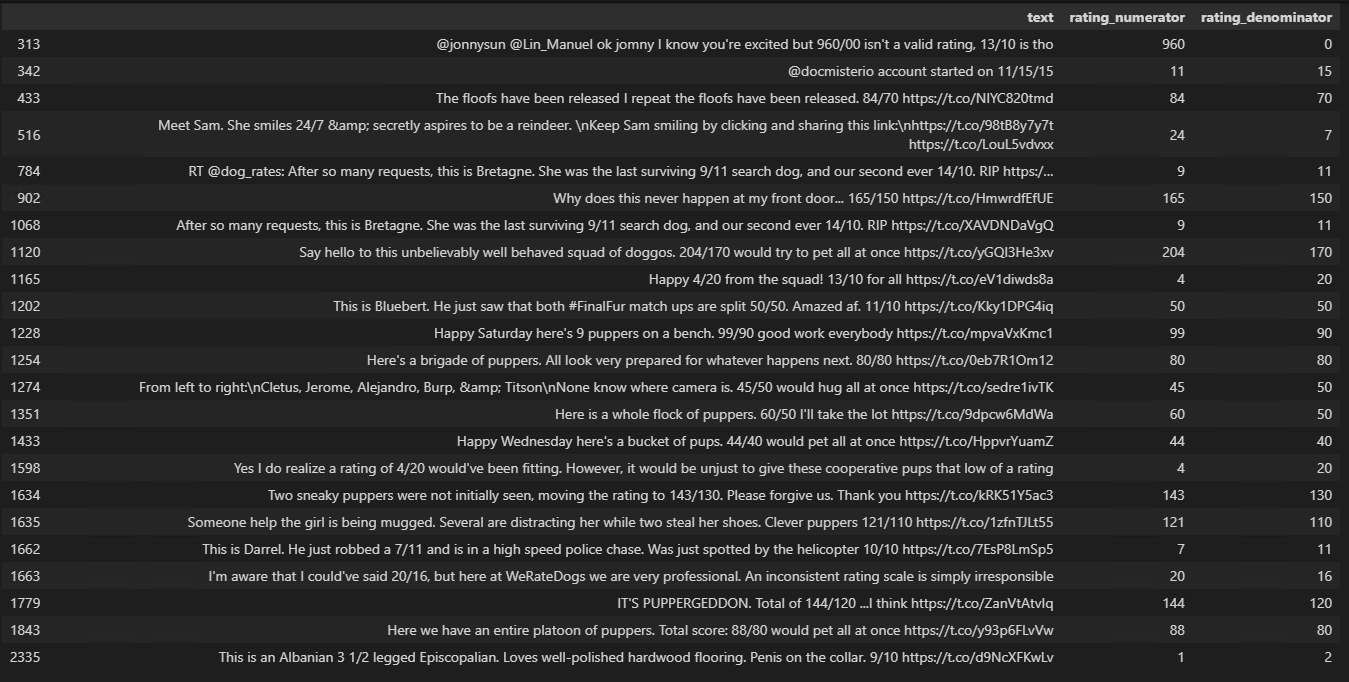

In [187]:
# Rows to Fix
idx_fix_den = ['313', '784', '1068', '1165', '1202', '1662', '2335']
idx_fix_num = {'313' : '13', '784' : '14', '1068' : '14', '1165' : '13', '1202' : '11', '1662' : '10', '2335' : '9'}
idx_fix_num = [['313', '13'], ['784', '14'], ['1068', '14'], ['1165', '13'], ['1202', '11'], ['1662', '10'], ['2335', '9']]
#
# Rows to Delete
idx_del = ['342', '433', '516', '902', '1120', '1228', '1254', '1274', '1351', '1433', '1598', '1634', '1635', '1663', '1779', '1843']

# Set the denominators = 10
for i in idx_fix_den:
    twitter_archive_clean.at[i, 'rating_denominator'] = 10

# Set the numerators = new value
for i, v in idx_fix_num:
    twitter_archive_clean.at[i, 'rating_numerator'] = v

# Drop rows
twitter_archive_clean.drop(idx_del, axis=0, inplace=True)

ValueError: too many values to unpack (expected 2)

#### Test

In [ ]:
twitter_archive.query('rating_denominator != 10')[['text', 'rating_numerator', 'rating_denominator']]

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

### Insights:
1.

2.

3.

### Visualization

### References
Downloading files using requests library: https://www.tutorialspoint.com/downloading-files-from-web-using-python<br>
Read Json file line by line into dataframe: https://stackoverflow.com/questions/20037430/reading-multiple-json-records-into-a-pandas-dataframe<br>
Strings that do not contain a value: https://stackoverflow.com/questions/17097643/search-for-does-not-contain-on-a-dataframe-in-pandas<br>
Convert case on multiple columns at same time: https://www.datasciencelearner.com/convert-entire-dataframe-columns-lower-case-upper-case/<br>

